# Importando Base de Dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [6]:
gorjetas = dados.rename(columns = renomear)

In [7]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao = {
    'No' : 'não',
    'Yes' : 'sim'
}

In [10]:
gorjetas.sobremesa.map(sim_nao)

0      não
1      não
2      não
3      não
4      não
      ... 
239    não
240    sim
241    sim
242    não
243    não
Name: sobremesa, Length: 244, dtype: object

In [11]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Sun,Dinner,2
1,10.34,1.66,não,Sun,Dinner,3
2,21.01,3.50,não,Sun,Dinner,3
3,23.68,3.31,não,Sun,Dinner,2
4,24.59,3.61,não,Sun,Dinner,4


In [14]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [16]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [17]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Dinner,2
1,10.34,1.66,não,Domingo,Dinner,3
2,21.01,3.50,não,Domingo,Dinner,3
3,23.68,3.31,não,Domingo,Dinner,2
4,24.59,3.61,não,Domingo,Dinner,4


In [18]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [19]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [20]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [21]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Jantar,2
1,10.34,1.66,não,Domingo,Jantar,3
2,21.01,3.50,não,Domingo,Jantar,3
3,23.68,3.31,não,Domingo,Jantar,2
4,24.59,3.61,não,Domingo,Jantar,4


## Importando o Seaborn

In [22]:
!pip install seaborn==0.9.0

In [23]:
import seaborn as sns

In [24]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\gusta\anaconda3\lib\site-packages
Requires: scipy, pandas, matplotlib, numpy
Required-by: 


## Análise 1 - Valor da conta e gorjeta

In [25]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

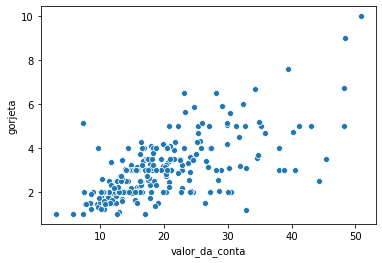

In [26]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

In [27]:
#Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [28]:
print('A base de dados contem {} registros'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contem 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Jantar,2
1,10.34,1.66,não,Domingo,Jantar,3
2,21.01,3.50,não,Domingo,Jantar,3
3,23.68,3.31,não,Domingo,Jantar,2
4,24.59,3.61,não,Domingo,Jantar,4


In [30]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [31]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.059447
1,10.34,1.66,não,Domingo,Jantar,3,0.160542
2,21.01,3.50,não,Domingo,Jantar,3,0.166587
3,23.68,3.31,não,Domingo,Jantar,2,0.139780
4,24.59,3.61,não,Domingo,Jantar,4,0.146808


In [32]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [33]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.06
1,10.34,1.66,não,Domingo,Jantar,3,0.16
2,21.01,3.50,não,Domingo,Jantar,3,0.17
3,23.68,3.31,não,Domingo,Jantar,2,0.14
4,24.59,3.61,não,Domingo,Jantar,4,0.15


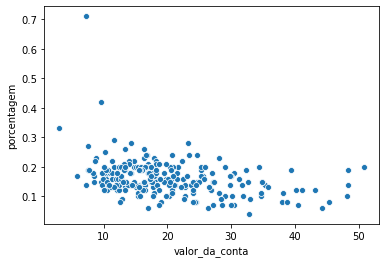

In [34]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [35]:
# Visualmente, o valor da conta não é proporcional ao valor da gorjeta

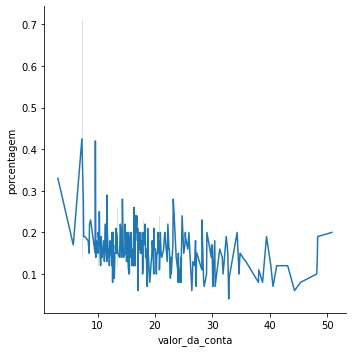

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',kind='line', data=gorjetas)

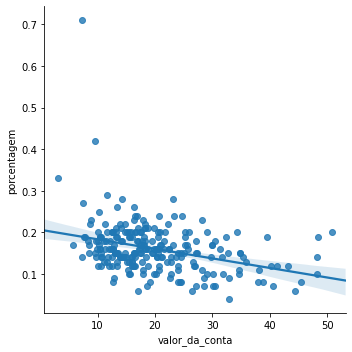

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [38]:
gorjetas[gorjetas.sobremesa == 'sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [39]:
gorjetas[gorjetas.sobremesa == 'não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


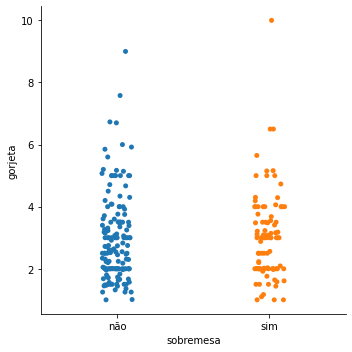

In [40]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

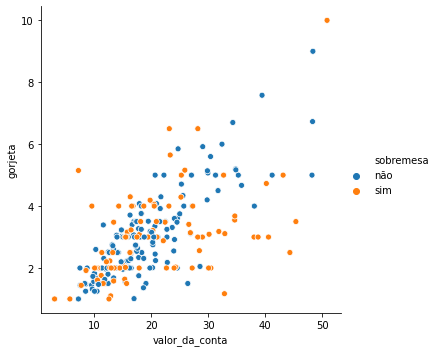

In [41]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

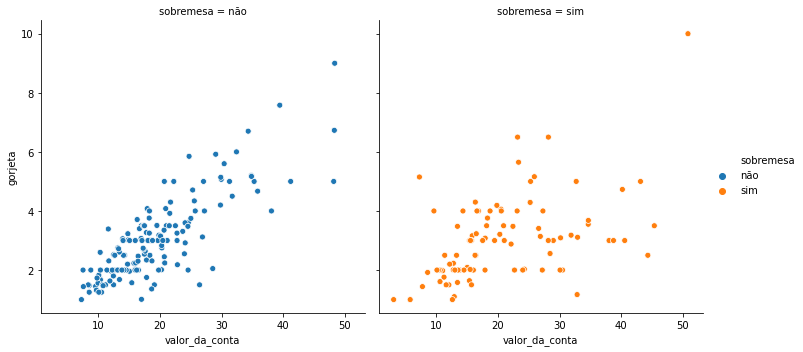

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

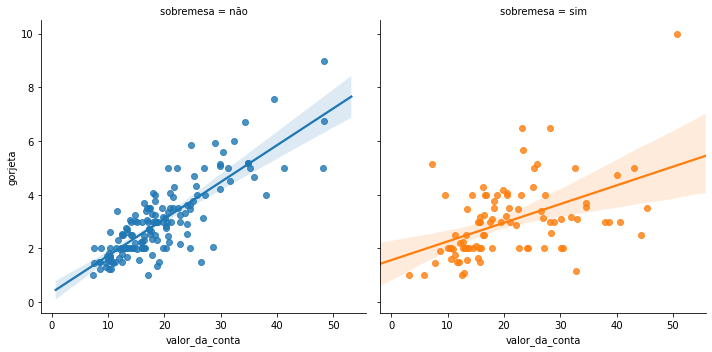

In [43]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

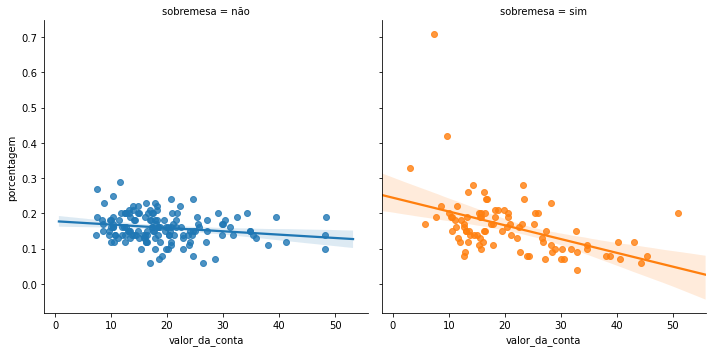

In [44]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

In [45]:
# Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

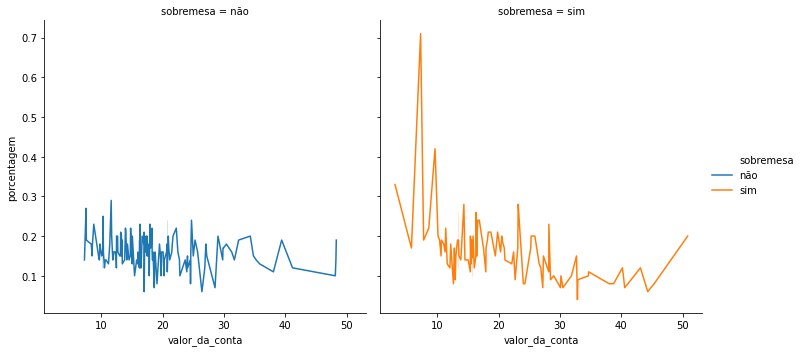

In [46]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [47]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjetas.query("sobremesa == 'sim'").porcentagem

In [49]:
sem_sobremesa = gorjetas.query("sobremesa == 'não'").porcentagem

In [50]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [51]:
r = ranksums(sobremesa, sem_sobremesa)

In [52]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [53]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

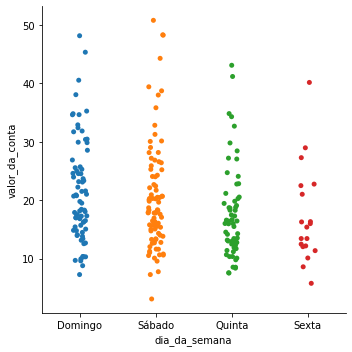

In [54]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

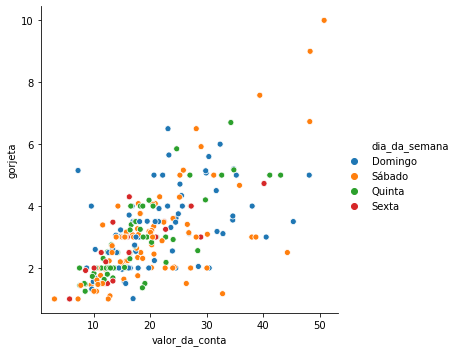

In [55]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

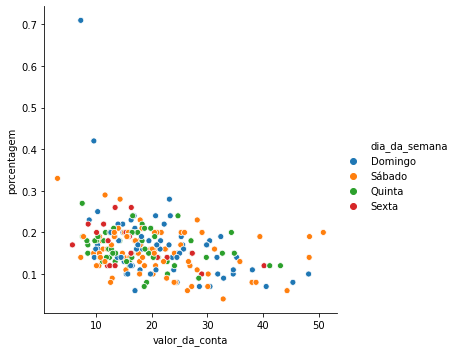

In [56]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

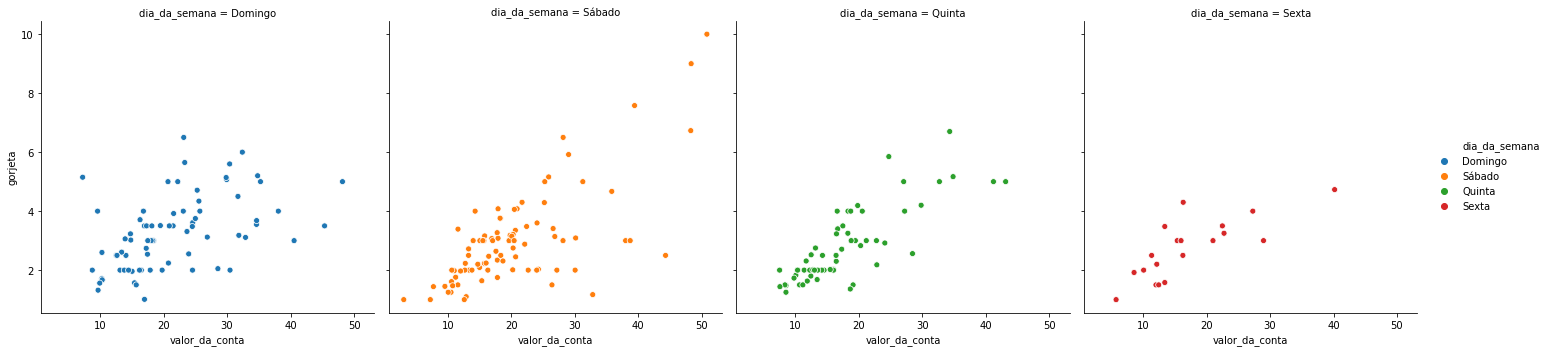

In [57]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

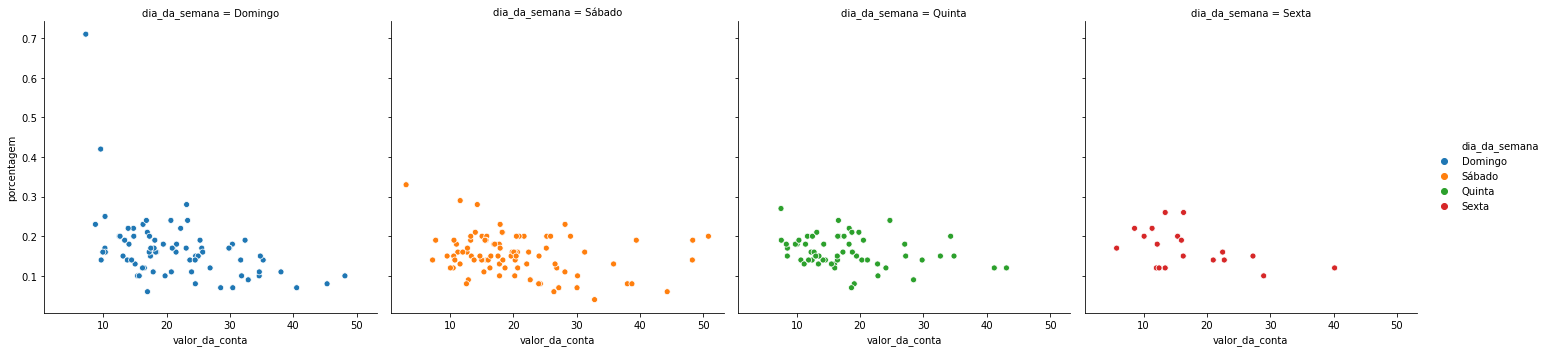

In [58]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

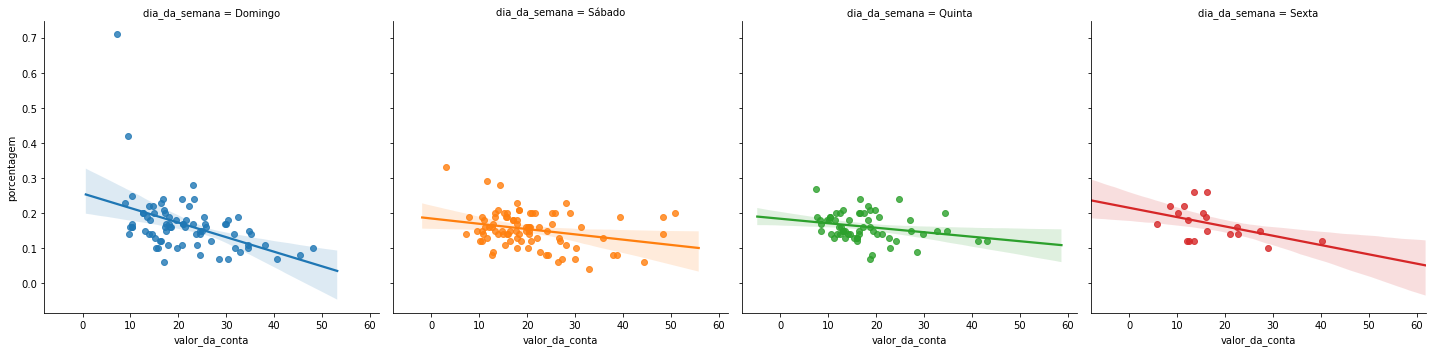

In [59]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [60]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [61]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [62]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [63]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [64]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [65]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [66]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**


# Análise 4 - Hora do Dia

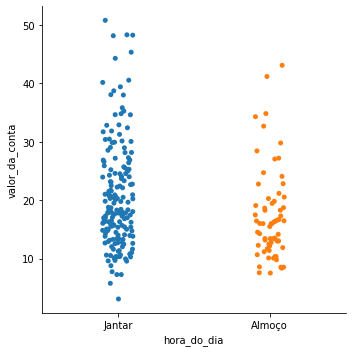

In [67]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

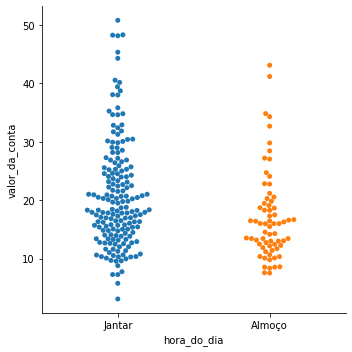

In [68]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

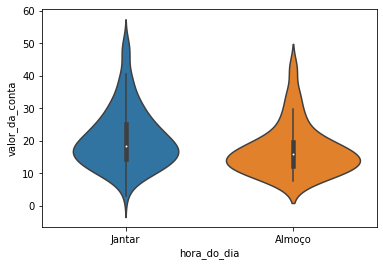

In [69]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

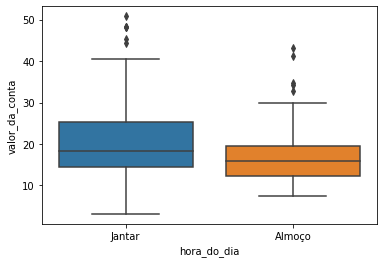

In [70]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [71]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

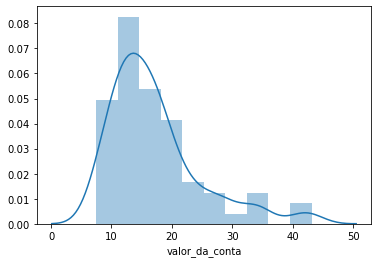

In [72]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

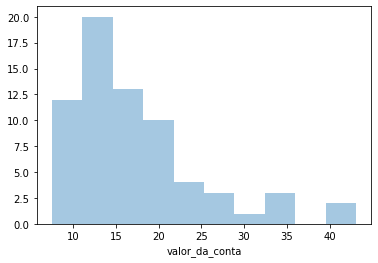

In [73]:
sns.distplot(almoco, kde=False)

In [74]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

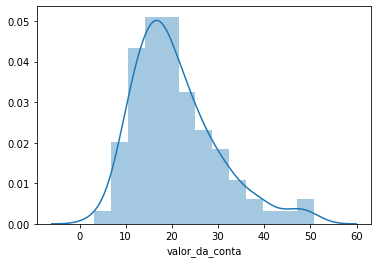

In [75]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

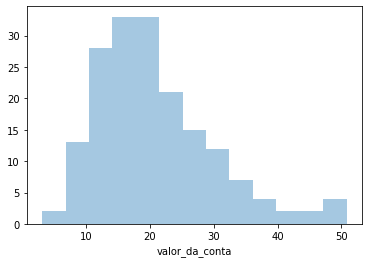

In [76]:
sns.distplot(jantar, kde=False)

In [77]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [78]:
r2 = ranksums(jantar, almoco)

In [79]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [80]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [81]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [82]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [83]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**